In [94]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

Part 1:

In [95]:
# open and read lines from data file
with open("ASTR19_F24_group_project_data.txt") as f:
    lines = f.readlines()

In [105]:
# parse data into days, times, and heights
days, times, heights = [], [], []

with open("ASTR19_F24_group_project_data.txt") as f:
    for line in f:
        # ignore lines that start with #
        if line.strip().startswith("#") or not line.strip():
            continue
        parts = line.split()
        days.append(float(parts[0]))
        hours, minutes = map(int, parts[1].split(":"))
        times.append(hours + minutes / 60)
        heights.append(float(parts[2]))

In [106]:
# turn days, times, heights itno arrays
days = np.array(days)
times = np.array(times)
heights = np.array(heights)
time_decimal = days + times / 24

In [107]:
# function
def tidal_model(t, a1, b1, c1, a2, b2, c2, offset):
    return (a1 * np.sin(b1 * t + c1) + a2 * np.sin(b2 * t + c2) + offset)

Part 2:

In [108]:
popt, pcov = curve_fit(
    tidal_model,
    time_decimal,
    heights,
    p0=[5, 2 * np.pi / 12, 0, 1, 2 * np.pi / 24, 0, 0]
)

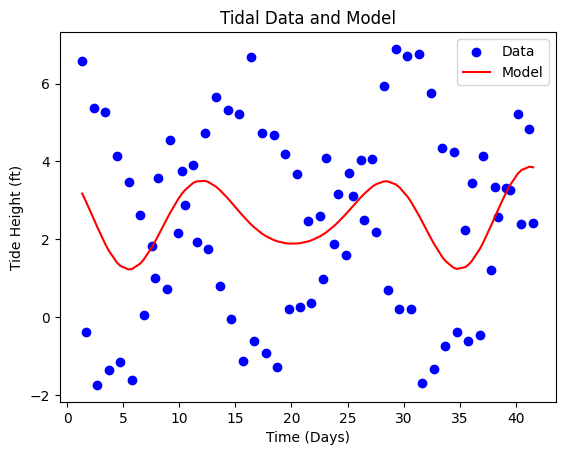

In [109]:
# plot data and model
plt.scatter(time_decimal, heights, label="Data", color="blue")
plt.plot(time_decimal, tidal_model(time_decimal, *popt), label="Model", color="red")
plt.xlabel("Time (Days)")
plt.ylabel("Tide Height (ft)")
plt.legend()
plt.title("Tidal Data and Model")
plt.savefig("tidal_model.pdf")
plt.show()

Part 3:

In [110]:
# residuals without best fit function
residuals = heights - tidal_model(time_decimal, *popt)

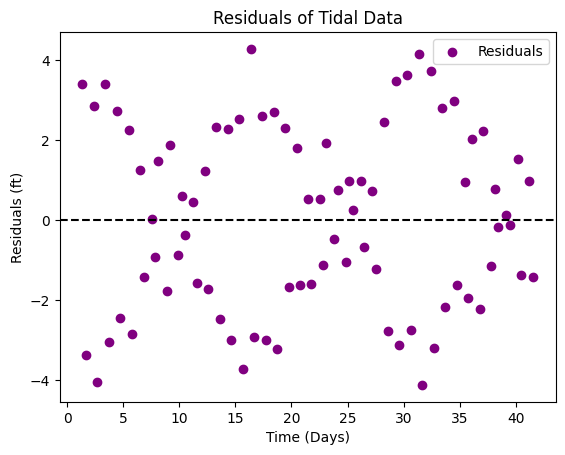

In [111]:
# plot of residuals without best fit function
plt.scatter(time_decimal, residuals, label="Residuals", color="purple")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Time (Days)")
plt.ylabel("Residuals (ft)")
plt.title("Residuals of Tidal Data")
plt.legend()
plt.savefig("residuals.pdf")
plt.show()

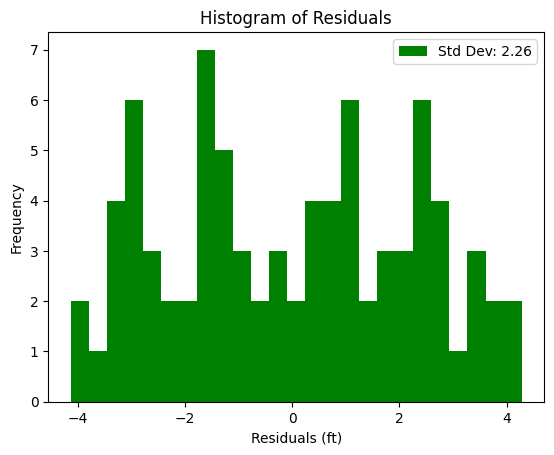

In [112]:
# histogram of residuals
std_residuals = np.std(residuals)
plt.hist(residuals, bins=25, color="green", label=f"Std Dev: {std_residuals:.2f}")
plt.xlabel("Residuals (ft)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.legend()
plt.savefig("residuals_histogram.pdf")
plt.show()

Part 4:

In [113]:
tsunami_dev = 2 / std_residuals
print(f"Tsunami deviation in terms of standard deviations: {tsunami_dev:.2f}")

Tsunami deviation in terms of standard deviations: 0.89


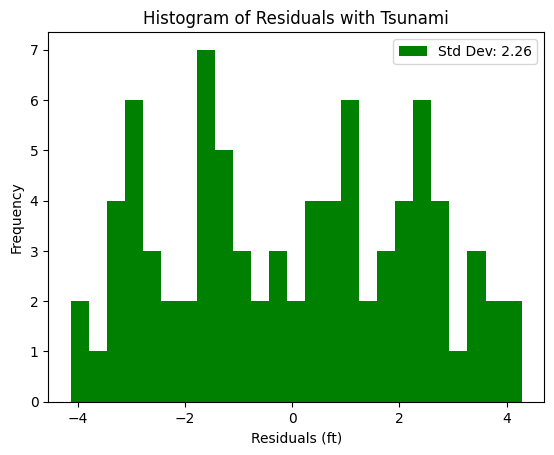

In [114]:
# histogram of residuals with tsunami data
residuals_with_tsunami = np.append(residuals, 2)
plt.hist(residuals_with_tsunami, bins=25, color="green", label=f"Std Dev: {std_residuals:.2f}")
plt.xlabel("Residuals (ft)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals with Tsunami")
plt.legend()
plt.savefig("residuals_histogram_with_tsunami.pdf")
plt.show()